# Advanced Statistics for Physics Analysis 2020 - 2021
## Lab 2 - Saverio Monaco

In [1]:
# Here we import all libraries we need:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Exercise 1

#### A set of measurements have been performed on the concentration of a contaminant in tap water. The following tables reports a set of values (x), with the corresponding probabilities given by the two methods (p1 and p2)

In [2]:
# We create the dataframe by creating the vectors of the single columns:
x  <- c(15.58, 15.9, 16  , 16.1, 16.2)
p1 <- c(0.15 , 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14 , 0.05, 0.64, 0.08, 0.09)

# Then we merge them
df1 <- as.data.frame(cbind(x, p1, p2))
df1

x,p1,p2
<dbl>,<dbl>,<dbl>
15.58,0.15,0.14
15.90,0.21,0.05
16.00,0.35,0.64
16.10,0.15,0.08
16.20,0.14,0.09


In [3]:
# We can check if the rows of probabilities are normalized to one by summing all the terms in the second row and
# third row:
sum(df1[,2]) & sum(df1[,3]) == 1

[1] TRUE

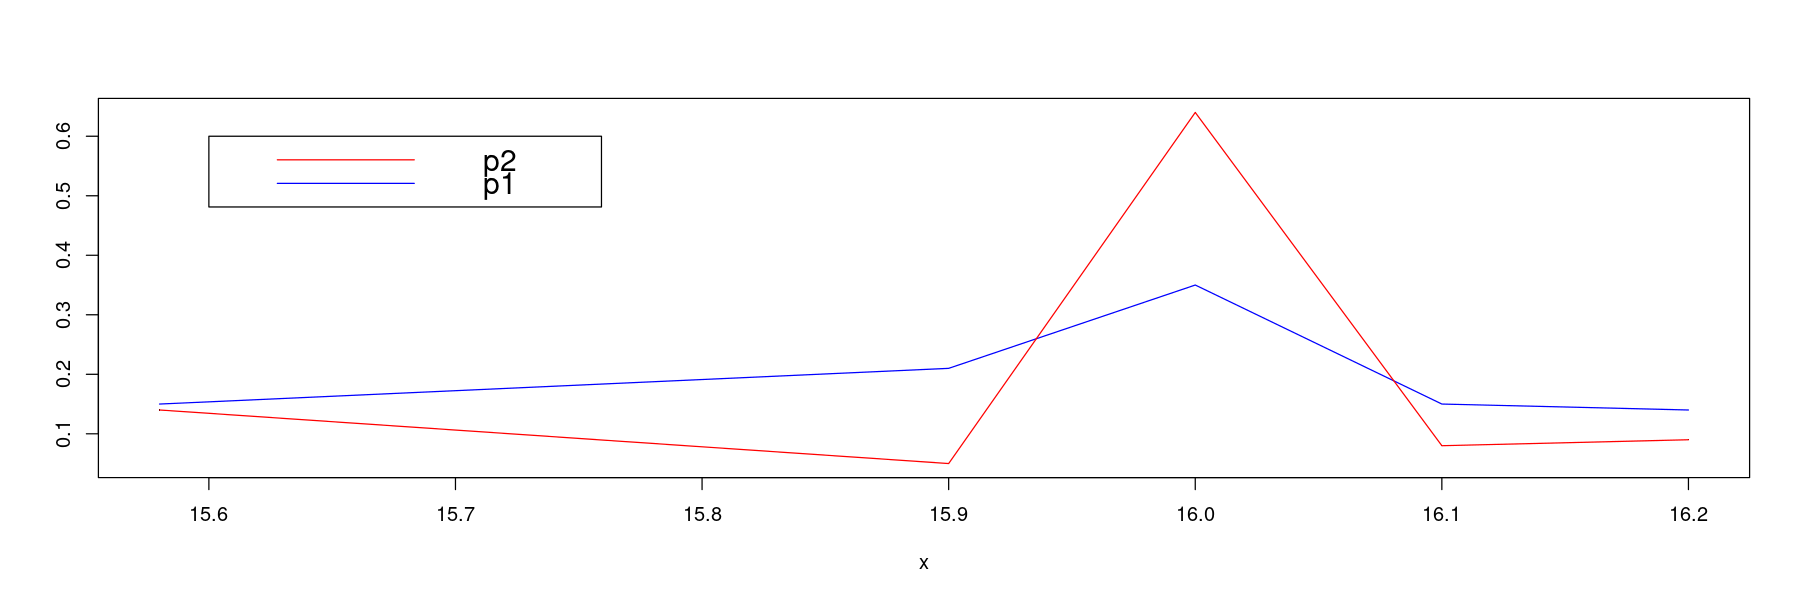

In [4]:
options(repr.plot.width=15, repr.plot.height=5)

plot(x,p2,pch='.',ylab='')
lines(x,p1,col='blue')
lines(x,p2,col='red')
legend(15.6, .6, legend=c("p2", "p1"),
       col=c("red", "blue"), lty=1:1, cex=1.5)

#### 1.1 Evaluate the expected values, E[X], and the variance, Var(X), for both methods

[1] 15.9590 15.9622
[1] 0.03397900 0.02816716


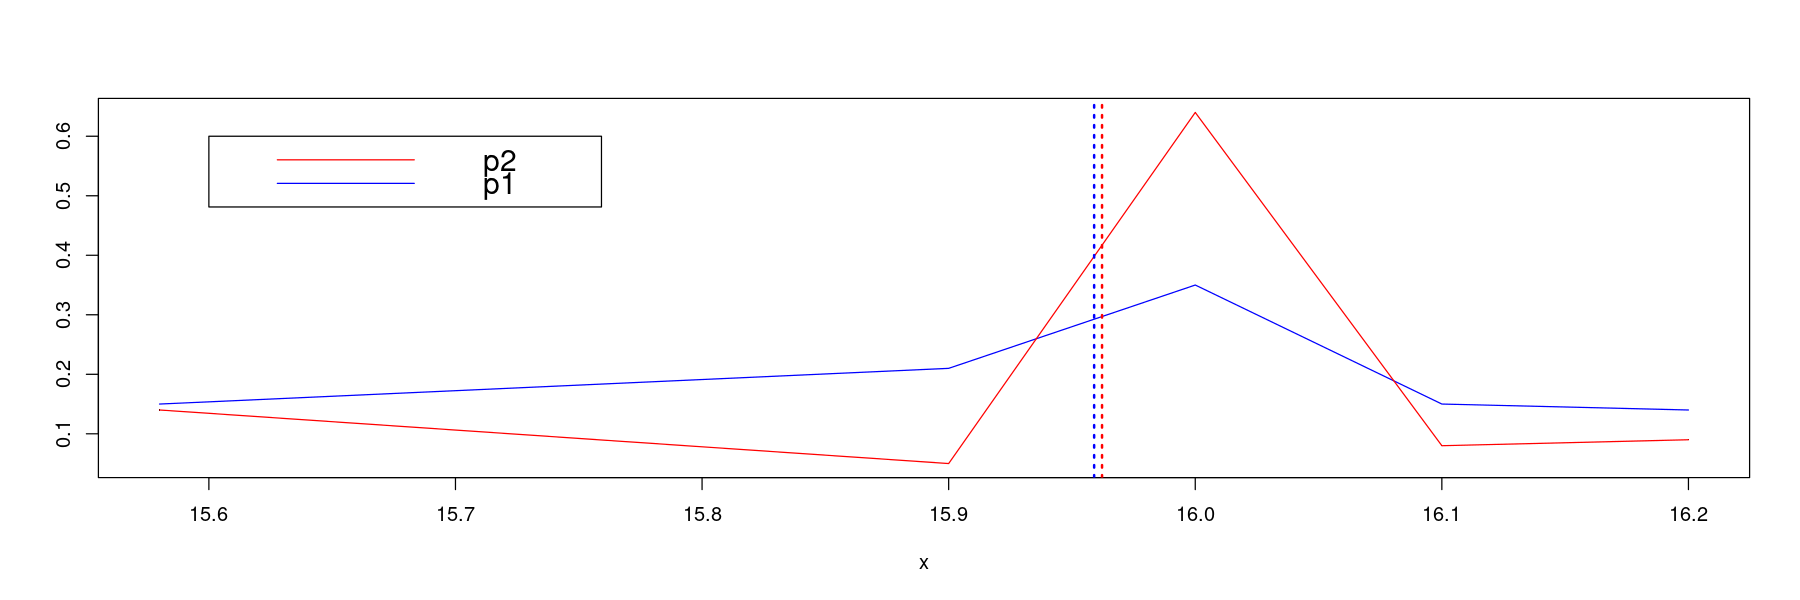

In [5]:
options(repr.plot.width=15, repr.plot.height=5)

# We expect for p1 to have a smaller mean (more to the left) and a higher variance:

dist1 <- df1$p1*df1$x
dist2 <- df1$p2*df1$x

mean1 <- sum(dist1)
mean2 <- sum(dist2)

print(c(mean1,mean2))

plot(x,p2,pch='.',ylab='')
lines(x,p1,col='blue')
lines(x,p2,col='red')
abline(v=mean1, col="blue", lwd=2, lty=3)
abline(v=mean2, col="red", lwd=2, lty=3)
legend(15.6, .6, legend=c("p2", "p1"),
       col=c("red", "blue"), lty=1:1, cex=1.5)

var1 <- sum(df1$p1*(df1$x - mean1)^2)
var2 <- sum(df1$p2*(df1$x - mean2)^2)

print(c(var1,var2))

For the mean and the variance of a discrete variable I used the formulas below:

$$\begin{align}Mean(X) &= \frac{\sum_i p_i x_i}{\sum_i p_i}=\sum_i p_i x_i \\
Var(X) &= \sum_i p_i(x_i - \mu)^2\end{align}$$

### Exercise 2

#### the waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30

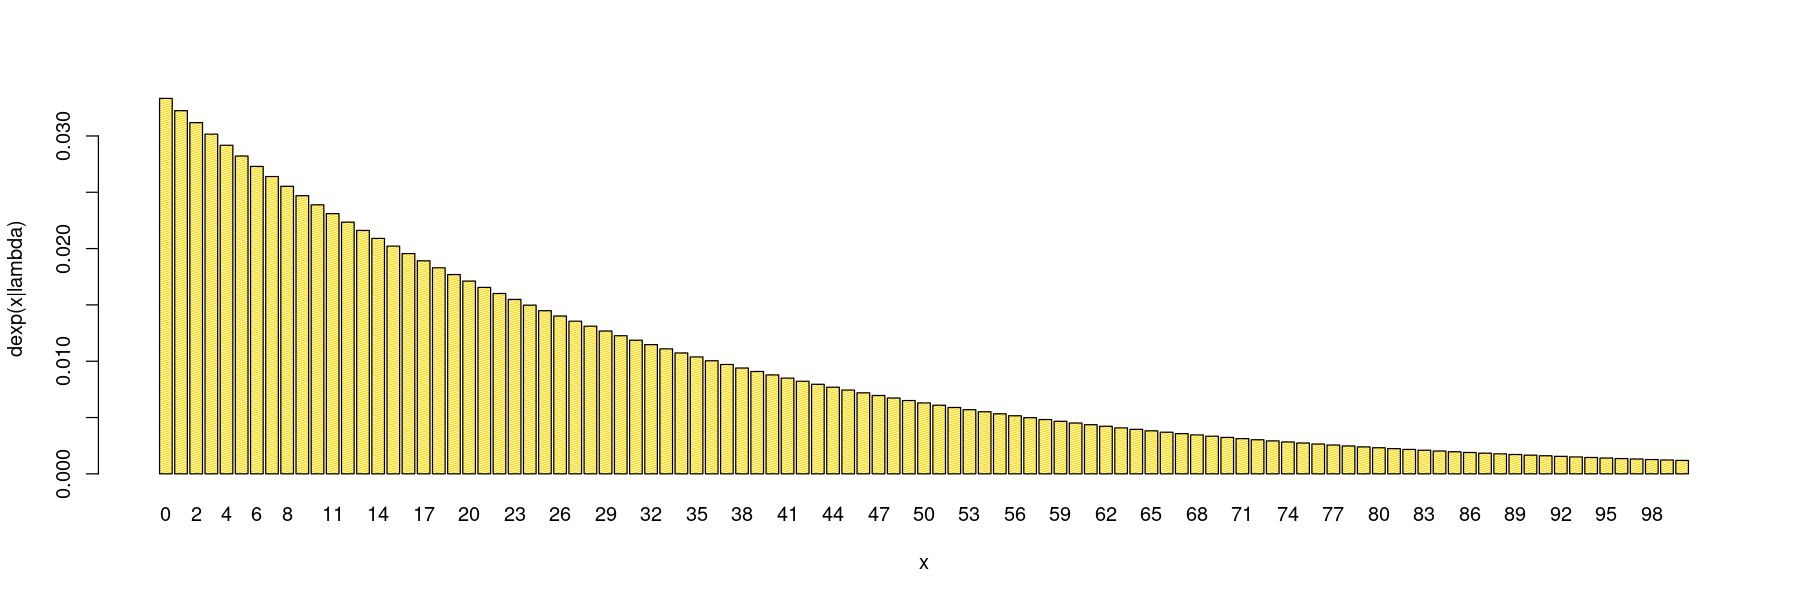

In [6]:
options(repr.plot.width=15, repr.plot.height=5)

# We can plot the distribution through a barplot
lambda <- 1/30; x <- 0:100; ap <- dexp(x,lambda)
barplot(ap, names=x, col='gold', xlab='x', ylab='dexp(x|lambda)', density = 50)

#### 2.1 Simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram

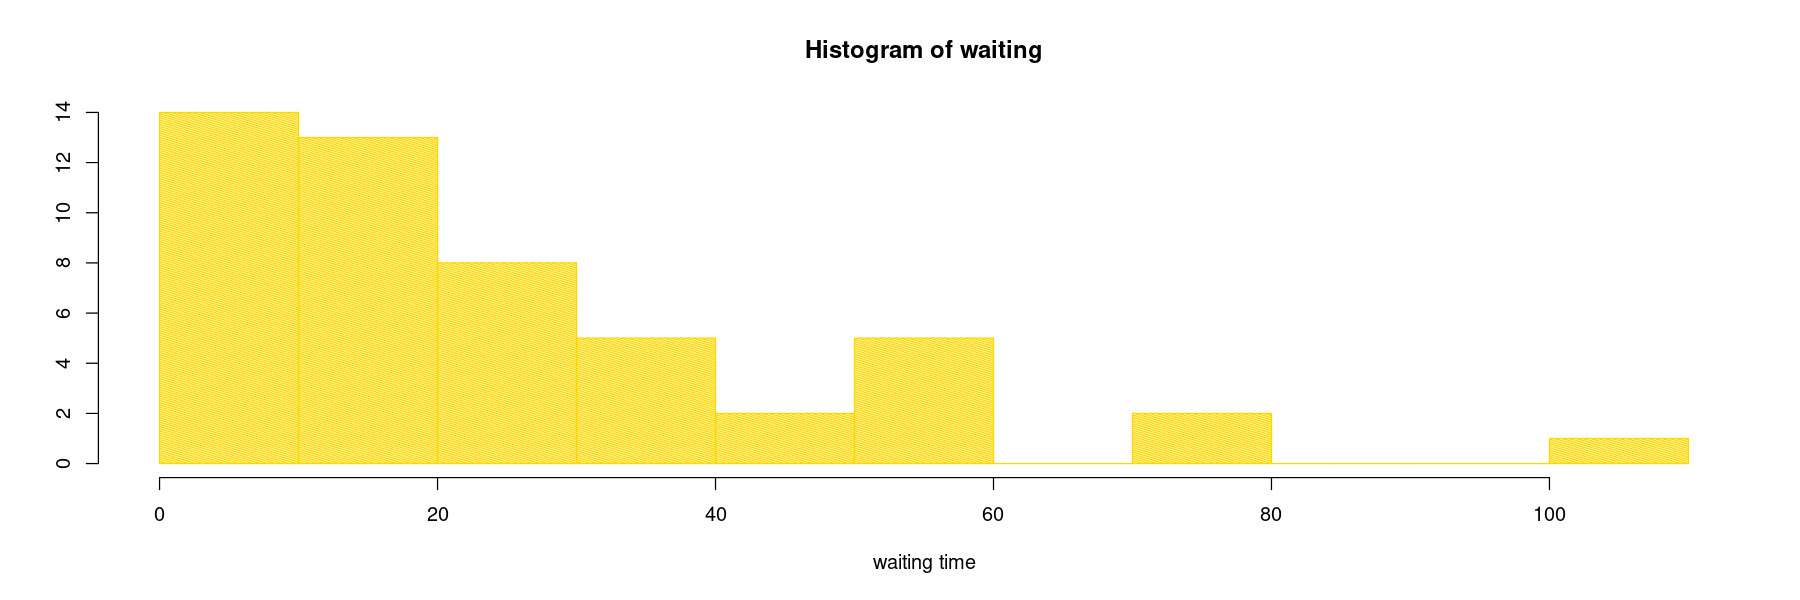

In [7]:
waiting <- rexp(50,lambda)
hist(waiting,col='gold', xlab='waiting time', ylab='', breaks = 12, density = 60)

#### 2.2 What is the probability that a person will wait for less than 10 minutes ?

$$\mathbb{P}[t\leq10]=\int_{-\infty}^{10}f(X)\,dx = \int_{0}^{10}f(X)\, dx $$

In [8]:
p1 <- integrate(function(x) {lambda*exp(-lambda*x)}, lower=0, upper=10)
print('The probability of waiting less than 10 minutes is:')
p1

[1] "The probability of waiting less than 10 minutes is:"


0.2834687 with absolute error < 3.1e-15

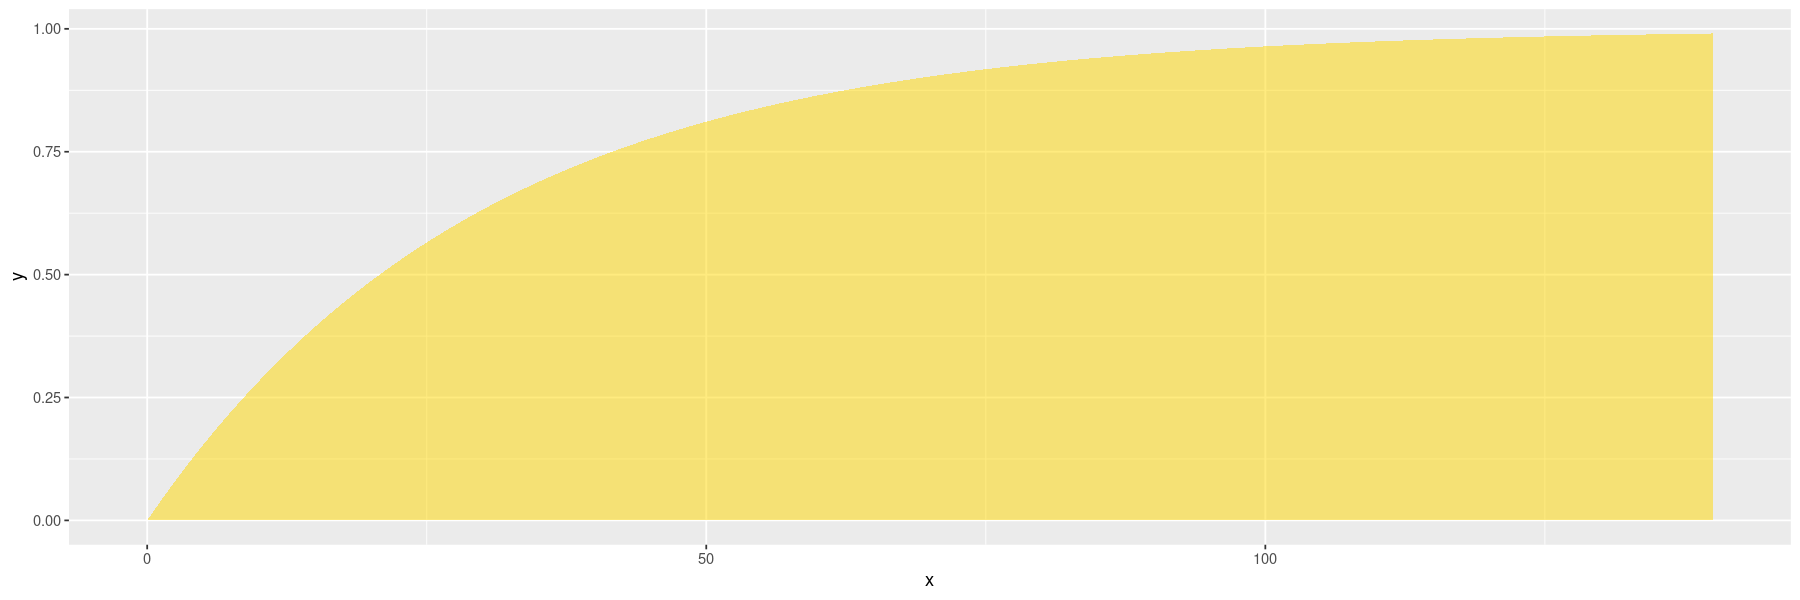

In [9]:
# Another way of doing that is using the cumulative density function of the exponential distribution:
x <- seq(0,140,.1)

df = data.frame(x=x,y=pexp(x,lambda))
df %>% ggplot(aes(x=x, y=y)) +
geom_ribbon(data=df,aes(ymax=y),ymin=0,
              fill="gold",colour=NA,alpha=0.5)

In [10]:
# To get the probability we have to evaluate the cumulative function at the poit '10'
p2 <- pexp(10,lambda)
p2

[1] 0.2834687

In [11]:
# We can see that the two probabilities are very similar:
p1
p2

0.2834687 with absolute error < 3.1e-15

[1] 0.2834687

#### 2.3 Ealuate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)

In [12]:
mean(waiting)

[1] 24.81249

We can derive the mean using the moment of order 1:
$$\mu \equiv E[x] = \int xf(x)\,dx = \int_0^{+\infty} x\lambda e^{-\lambda x}dx = \frac{1}{\lambda}\int_0^{+\infty} \eta e^{-\eta}\,d\eta =$$
(By part)
$$=\frac{1}{\lambda}\left(\left[-\eta e^{-\eta}\right]^{+\infty}_0 + \int_0^{+\infty} e^{-\eta}\,d\eta\right)=\frac{1}{\lambda}\left(\left[-e^{-\eta}\right]_0^{+\infty}\right) = \frac{1}{\lambda}$$

In [13]:
1/lambda

[1] 30

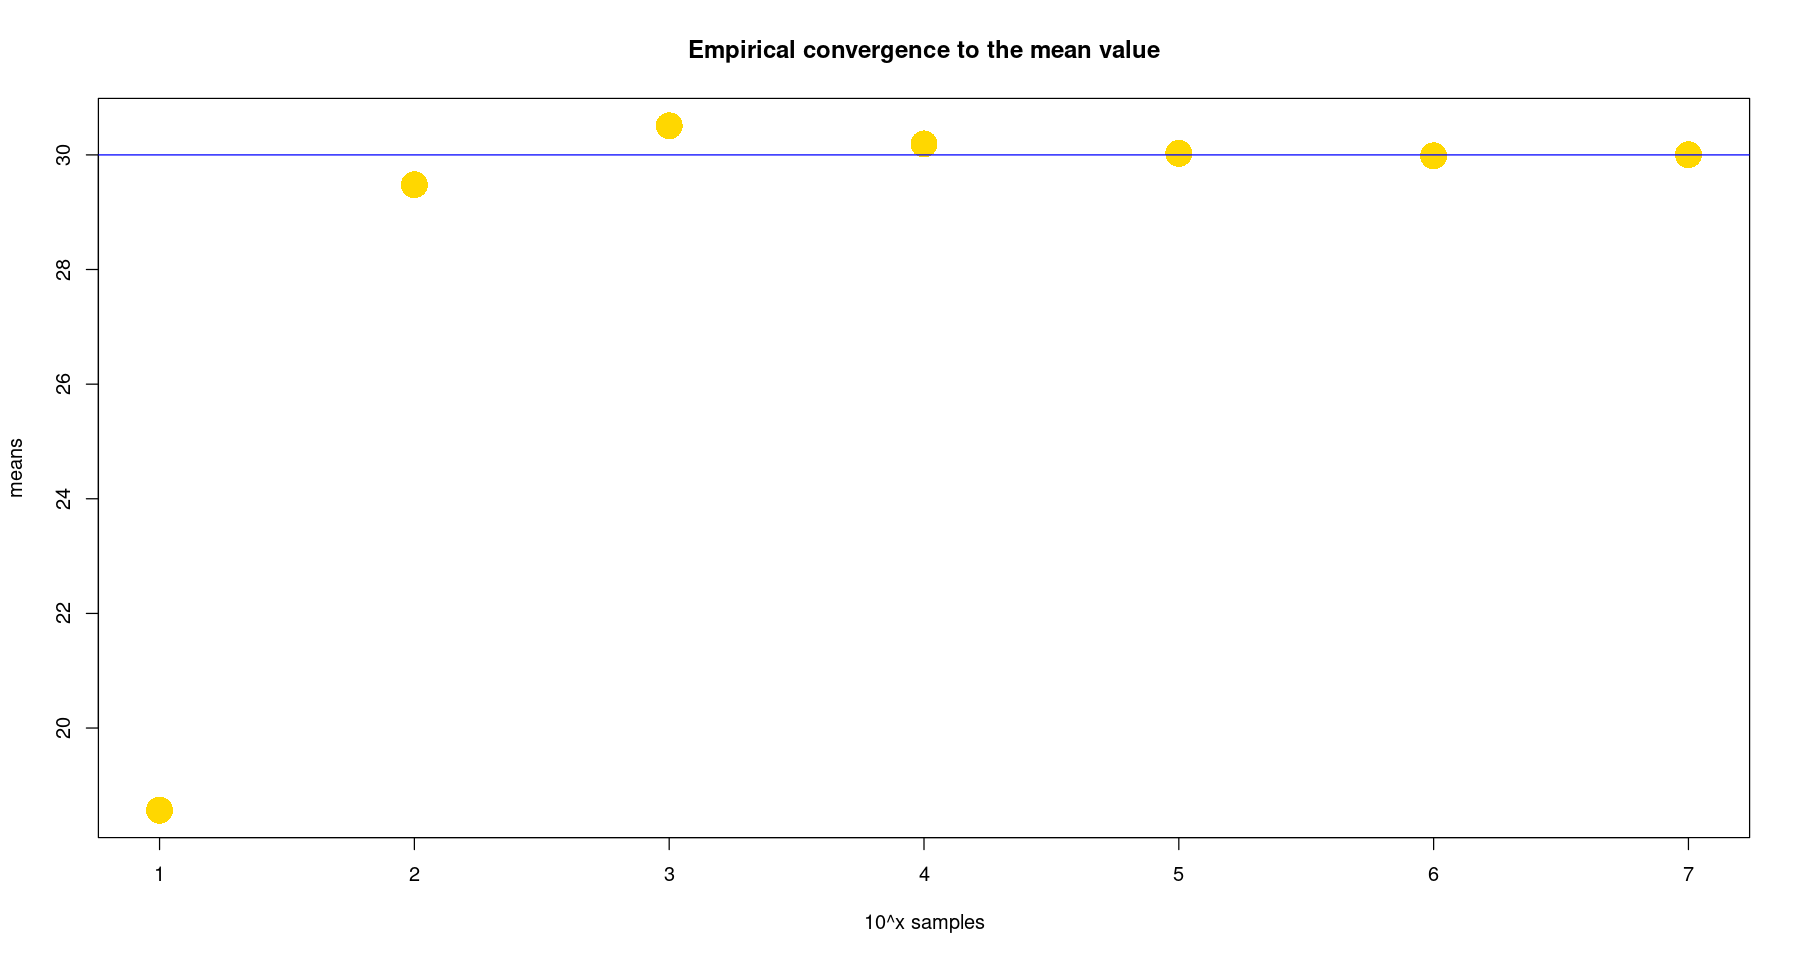

In [14]:
options(repr.plot.width=15, repr.plot.height=8)

# The empirical mean cannot be exactly be the one using theory because we have a limited amount of data
# the more data we have, the better the empirical mean represents the theoretical one

x <- seq(1:7)
x <- 10^x

means <- c()
for (i in 1:length(x))
    {
        temp  <- rexp(x[i],lambda)
        means <- c(means, mean(temp))
    }

plot(seq(1:7),means,pch=16,col='gold',cex=3, main='Empirical convergence to the mean value',xlab='10^x samples')
abline(h=1/lambda, col="blue")

#### 2.4 What is the probability for waiting more than one hour before being received ?

$$\mathbb{P}[t\geq60]=1-\mathbb{P}[t<60]= 1 - \int_{0}^{60}f(X)\, dx $$

In [15]:
p <- integrate(function(x) {lambda*exp(-lambda*x)}, lower=0, upper=60)
p <-1-p$val
print('The probability of waiting more than 60 minutes is:')
p

[1] "The probability of waiting more than 60 minutes is:"


[1] 0.1353353

In [16]:
# As always we can use the already present cumulative distribution in R
p <- 1 - pexp(60,lambda)
p

[1] 0.1353353

### Exercise 3

#### 3.1 Let’s suppose that on a book, on average, there is one typo error every three pages. If the number of errors follows a Poisson distribution, plot the pdf and cdf, and calculate the probability that there is at least one error on a specific page of the book

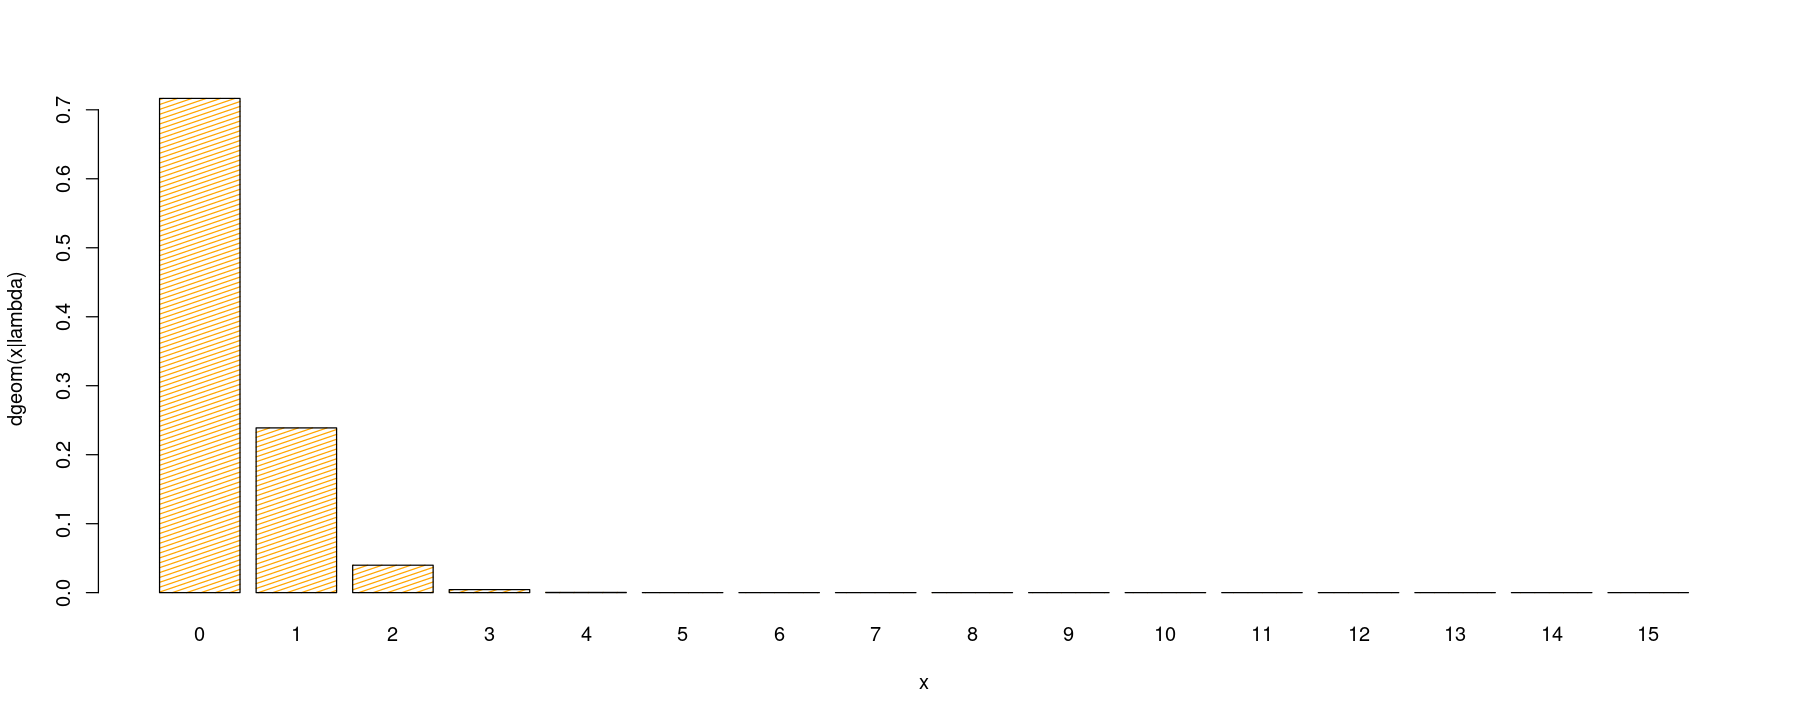

In [17]:
options(repr.plot.width=15, repr.plot.height=6)

lambda <- 1/3; x <- 0:15;
ap <- dpois(x,lambda)
barplot(ap, names=x, col='orange', xlab='x', ylab='dgeom(x|lambda)', density = 30)

In [18]:
p <- 1 - ppois(0,lambda)
p

[1] 0.2834687

### Exercise 4

#### 4.1 We randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. Calculate the probability that at least 10 draws are needed.

0.5293932 with absolute error < 5.9e-15

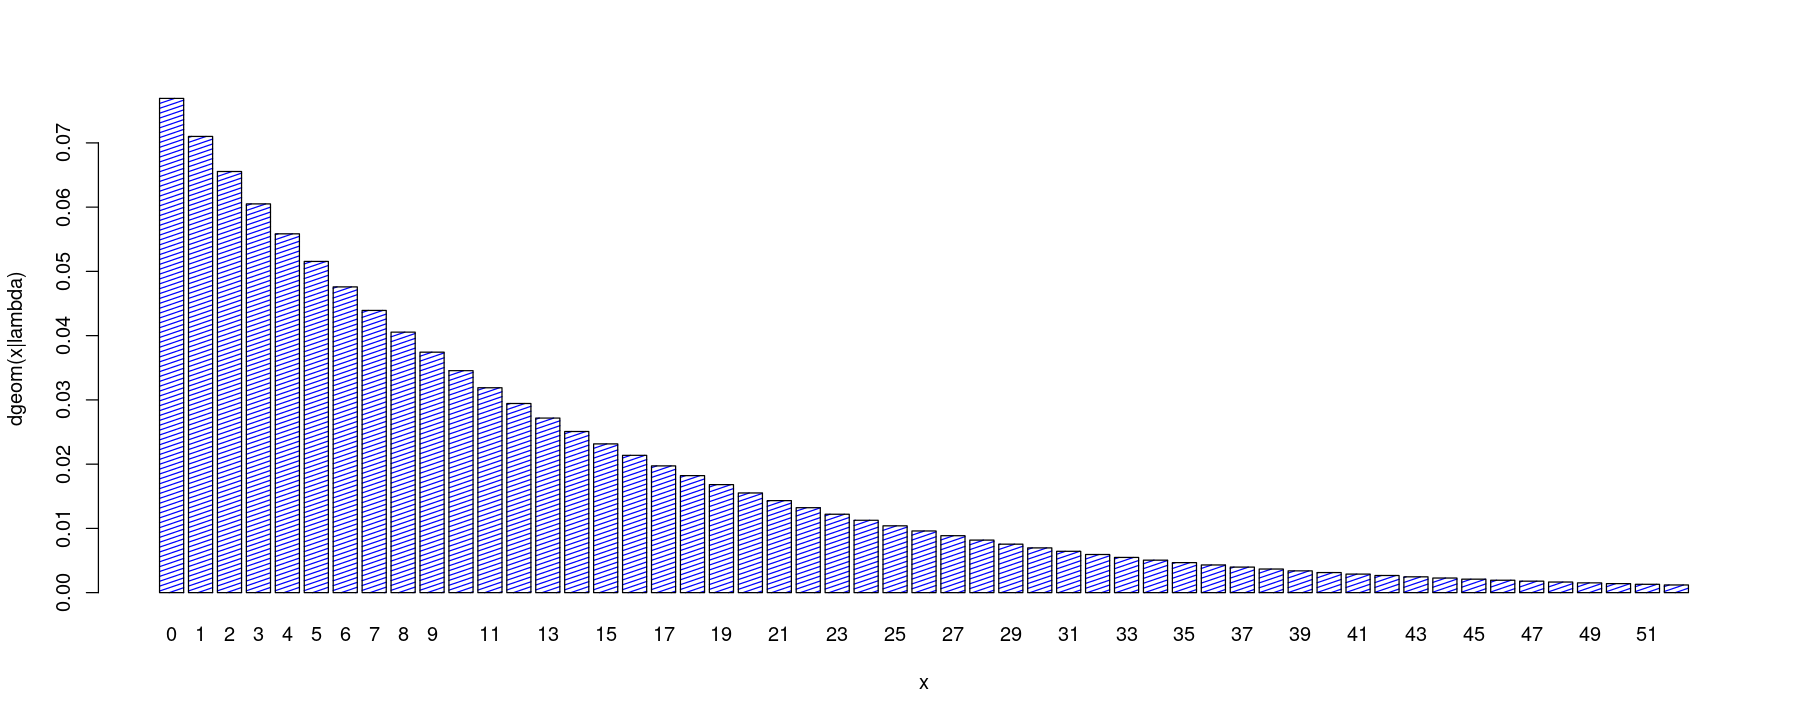

In [19]:
# This problem is very similar to the 'drunk-man and the home keys problem', since cards are put again in the deck
# no 'memory' is kept

# This is a geometric distribution with probability 4/52
p <- 4/52; x <- 0:52;

ap <- dgeom(x,p)
barplot(ap, names=x, col='blue', xlab='x', ylab='dgeom(x|lambda)', density = 30)

tendraws <- integrate(function(x) {p*(1-p)^x}, lower= 0, upper=10)
tendraws

[1] 13

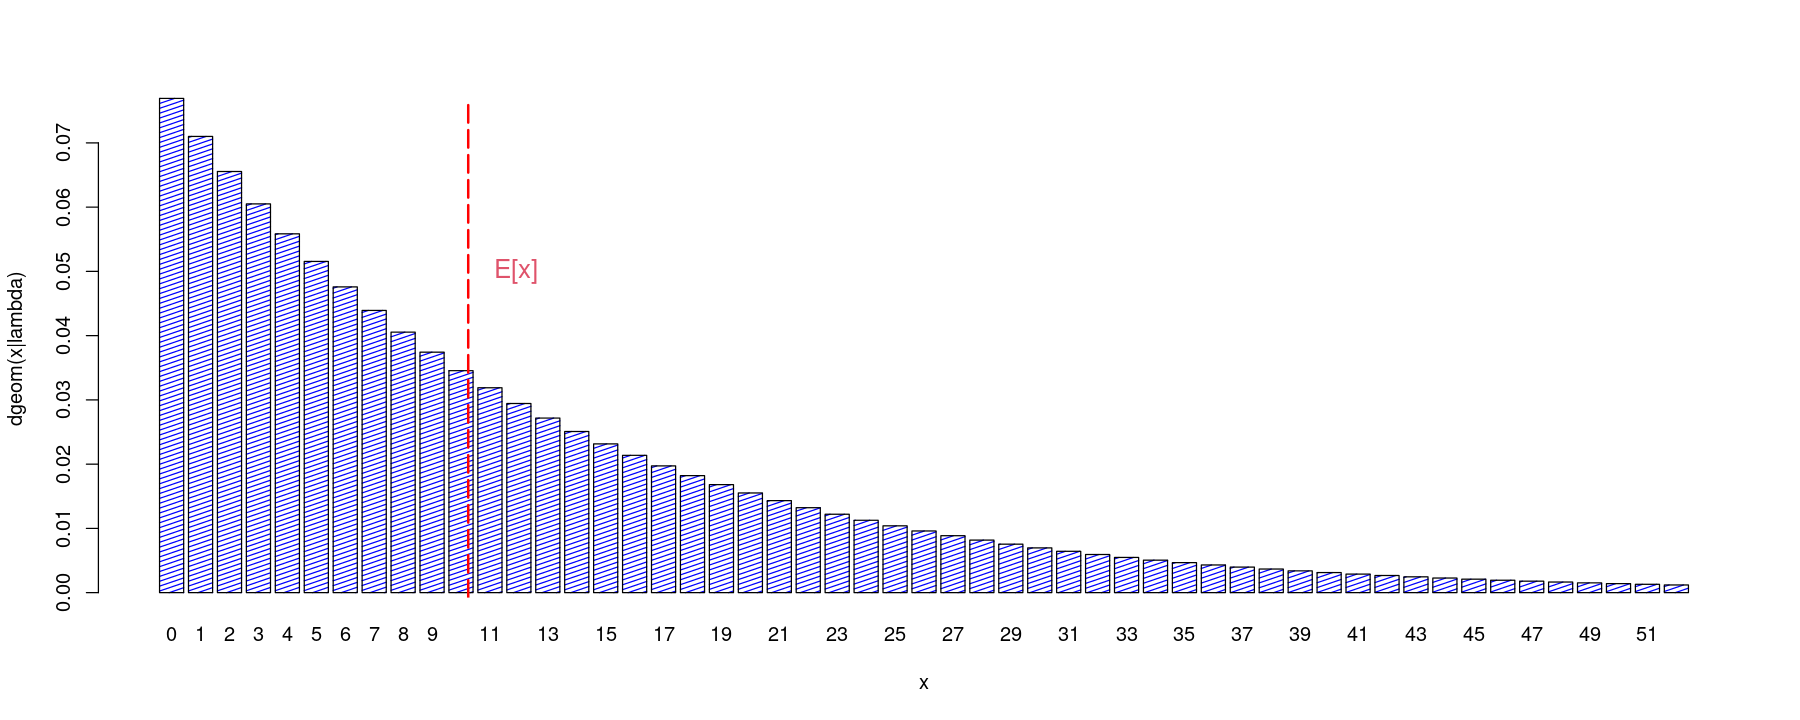

In [20]:
# As seen in the lecture, the best bet is the first one, having the highest probability, but the mean isn't
# For a geometric distribution the mean is 1/p
1/p
barplot(ap, names=x, col='blue', xlab='x', ylab='dgeom(x|lambda)', density = 30)
abline(v=1/p, col="red",lty=5, lwd=2)
text(1/p+2, 0.05, "E[x]",cex = 1.3, col = 2)

### Exercise 5

#### The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form:

$$ f(X)=\begin{cases} c(t-1)(2-t) & 1\le t \le 2\\ 0 & \text{otherwise}\end{cases}$$

#### where t is the time in hours.

#### 5.1 Using the integrate() R function, determine the constant c (and verify it analytically)

In [21]:
notnormalized <- integrate(function(t) {(t-1)*(2-t)}, lower=1, upper=2)
c <- 1/notnormalized$value
c

[1] 6

$$\begin{align}
    \int_{-\infty}^{+\infty} f(X)\,dx &= \int_{1}^{2} c(t-1)(2-t)\,dt = c \int_{1}^{2} (t-1)(2-t)\,dt = \\
                                      &= c \int_{1}^{2} \left(2t - t^2 - 2 + t\right) = c \int_{1}^{2} \left(3t - t^2 - 2 \right) =\\
                                      &= c\left(\frac{3}{2}\left[t^2\right]^2_1  - \frac{1}{3}\left[t^3\right]^2_1 - 2\left[t\right]^2_1\right) =\\
                                      &= c\left(\frac{9}{2} - \frac{7}{3} - 2\right) = \frac{c}{6} \Rightarrow
  \end{align}$$
  
  $$\Rightarrow \frac{c}{6} =1 \to c=6$$

#### 5.2 Write the set of four R functions and plot the pdf and cdf, respectively

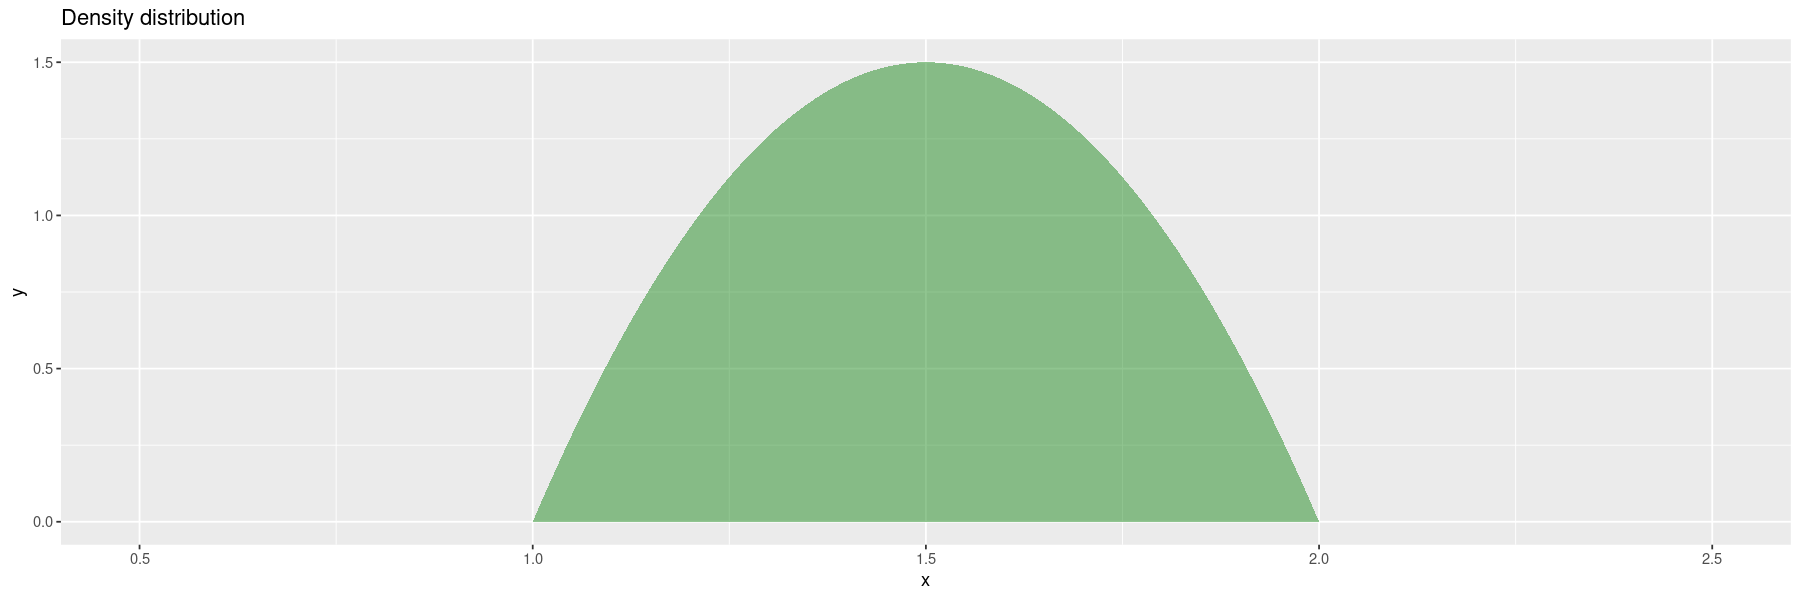

In [22]:
options(repr.plot.width=15, repr.plot.height=5)

dtolc <- function(t)
    {
        ifelse(t>=1 & t <= 2, 6*(t-1)*(2-t), 0)
    }

x <- seq(.5,2.5,.01)

df = data.frame(x=x,y=dtolc(x))
df %>% ggplot(aes(x=x, y=y)) +
geom_ribbon(data=df,aes(ymax=y),ymin=0,
              fill="forestgreen",colour=NA,alpha=0.5) +
ggtitle('Density distribution')

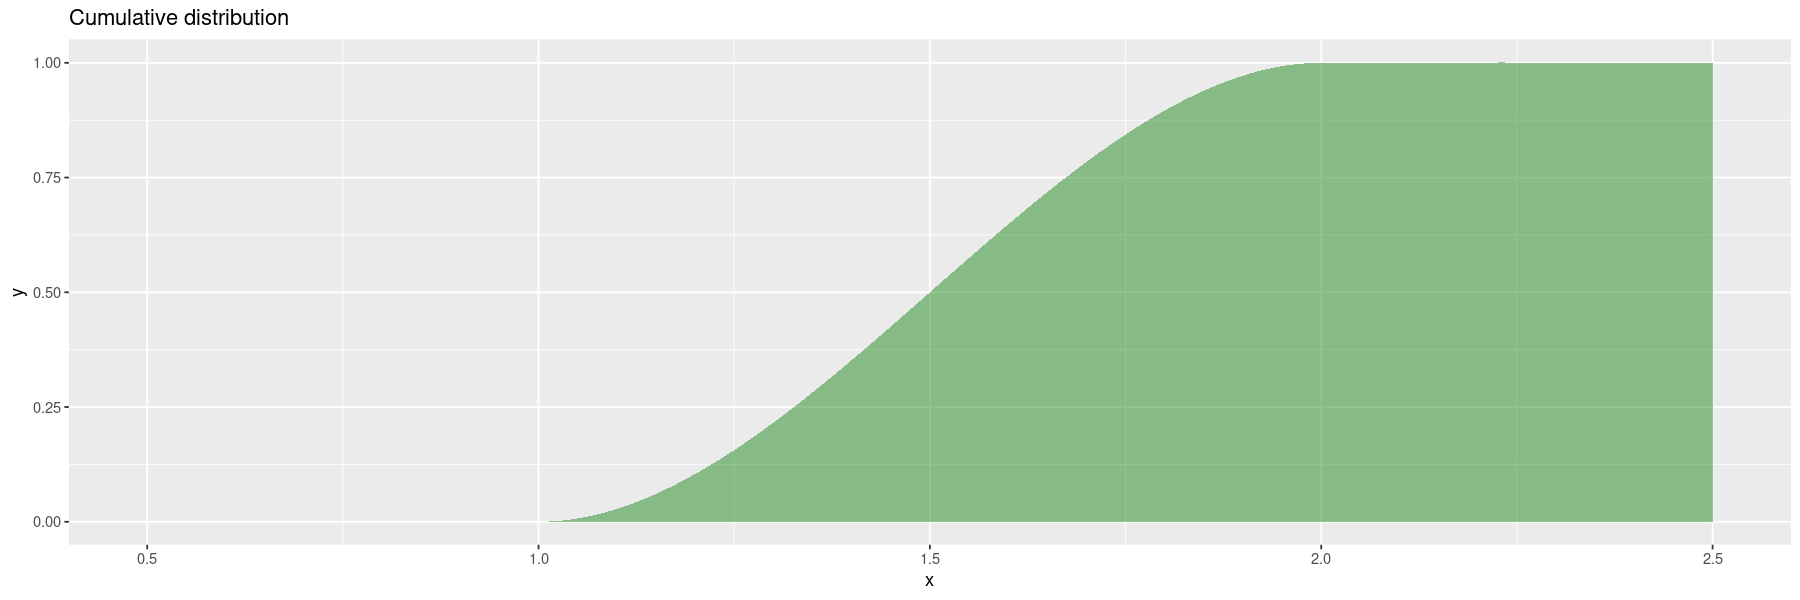

In [23]:
ptolc <- function(t)
    {
        ifelse(t>1,integrate(function(x) {dtolc(x)}, lower=1, upper=t)$value,0)
    }
ptolc <- Vectorize(ptolc)

x <- seq(.5,2.5,.01)

df = data.frame(x=x,y=ptolc(x))
df %>% ggplot(aes(x=x, y=y)) +
geom_ribbon(data=df,aes(ymax=y),ymin=0,
              fill="forestgreen",colour=NA,alpha=0.5)+
ggtitle('Cumulative distribution')

I didn't manage to find the inverse of the cumulative function analitically although it is possible.
I used the *Series Reversion method*

$$F(X)=\int_1^k 6(t-1)(2-t)\, dt= -2k^3+9k^2-12k+5$$

$$G(u) = c + \frac{1}{F^\prime(c)}\left(u-F(c)\right) - \frac{F^{\prime\prime}(c)}{2F^\prime(c)^3}\left(u-F(c)\right)^2 + \frac{3F^{\prime\prime}(c)^2 - F^{\prime\prime\prime}(c)F^\prime(c)}{6F^\prime(c)^5}\left(u-F(c)\right)^3$$

Where c is our middle point, namely $\frac{3}{2}$ since k can go from 1 to 2.

In [24]:
c     <- 1.5
fc    <- ptolc(c)
fpc   <- -6* (c^2) + 18* c -12
fppc  <- -12*c + 18
fpppc <- -12

In [25]:
qtolc <- function(p)
    {
        ifelse(p>=0 & p<= 1,c + ((p - fc)/fpc) - ((fppc/(2*fpc^3))*(p - fc)^2) + (((3*fppc^2) - fpppc*fpc)/(6*fpc^5))*(p-fc)^3  ,0)
    }
qtolc <- Vectorize(qtolc)


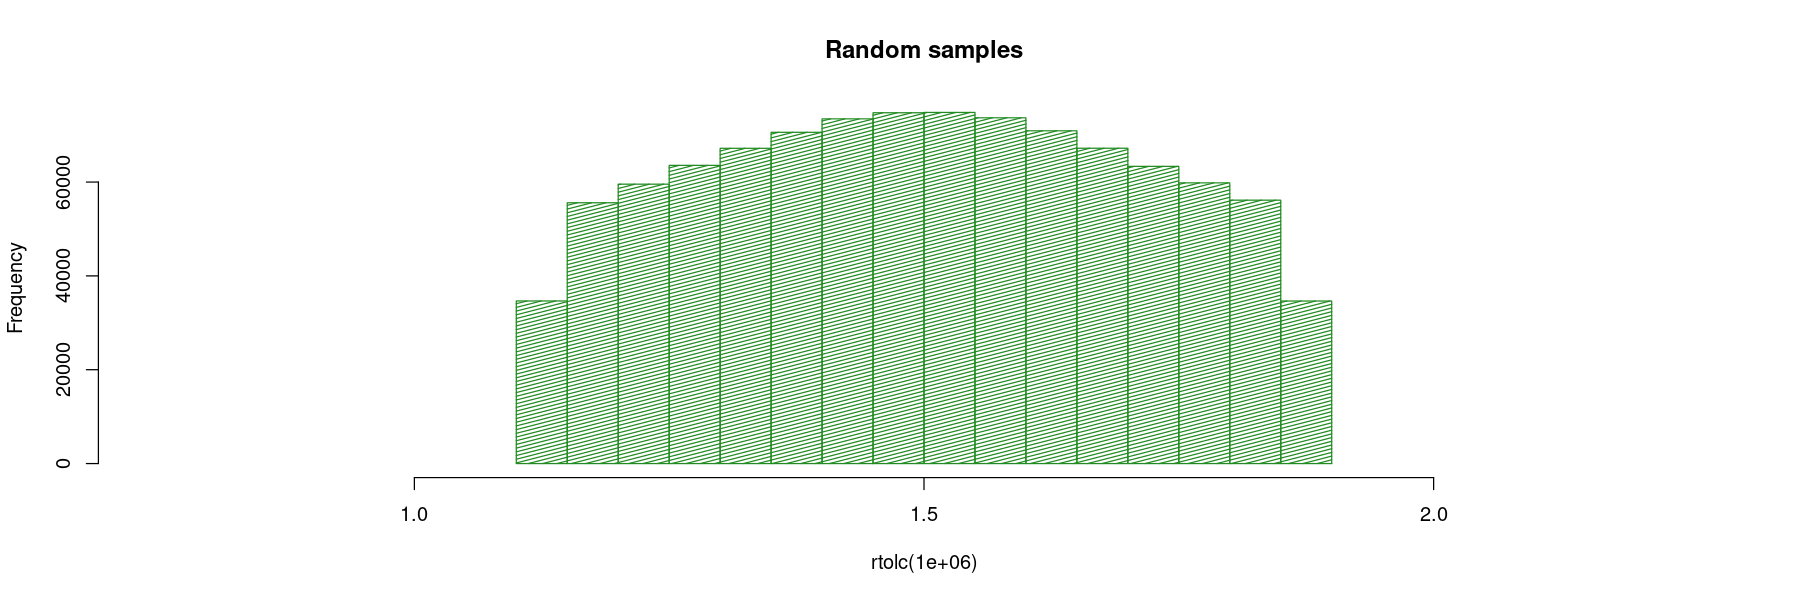

In [26]:
rtolc <- function(N)
    {
        qtolc(runif(N))
    }
hist(rtolc(1000000),xlim=c(0.75,2.25),col='forestgreen', density = 30, main='Random samples')

#### 5.3 Evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take between 90 and 120 minutes.

In [27]:
t1 <- 75/60
t2 <- 90/60
t3 <- 120/60

p1 <- 1 - ptolc(t1)

paste('P in more than', t1*60, 'minutes: ', p1)


# To find the probability that the student will take between 90 and 120 minutes we must trace the area between 
# 120 and 90, we can then just compute the cumulative at 120 and subtract the value of the cumulative at 90:
p2 <- ptolc(t3) - ptolc(t2)
paste('P between', t2*60, 'and', t3*60 ,'minutes: ', p2)

# Seing the distribution from dtolc it makes sense it is exatcly 0.5 since we traced half total area

[1] "P in more than 75 minutes:  0.84375"

[1] "P between 90 and 120 minutes:  0.5"

### Exercise 6

#### The lifetime of tires sold by an used tires shop is $10^4·x$ km, where x is a random variable following the distribution function

$$f(X)=\begin{cases}2/x^2 & 1\le x\le 2\\ 0 & \text{otherwise}\end{cases}$$

#### 6.1 Write the set of four R functions and plot the pdf and cdf, respectively

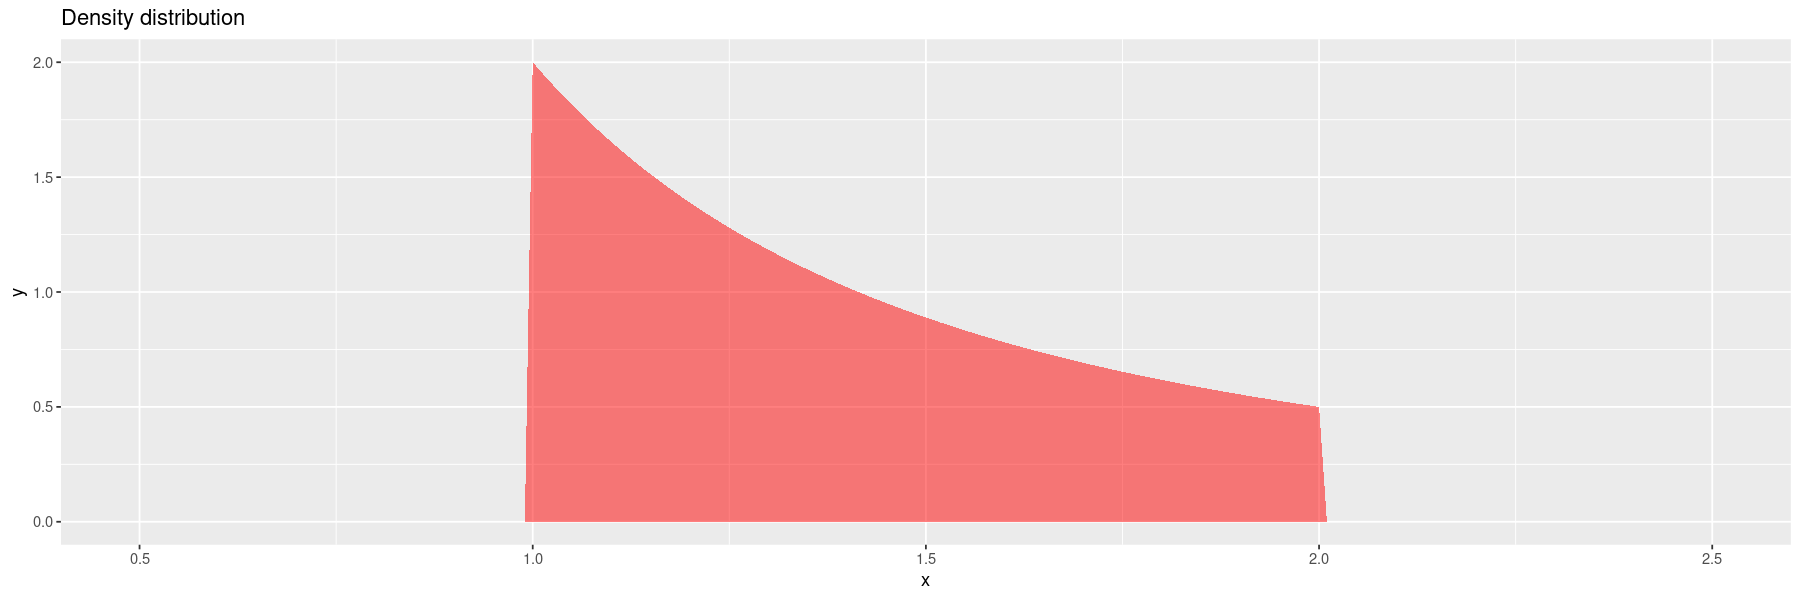

In [28]:
options(repr.plot.width=15, repr.plot.height=5)

dtire <- function(t)
    {
        ifelse(t>=1 & t <= 2, 2/x^2, 0)
    }

x <- seq(.5,2.5,.01)

df = data.frame(x=x,y=dtire(x))
df %>% ggplot(aes(x=x, y=y)) +
geom_ribbon(data=df,aes(ymax=y),ymin=0,
              fill="red",colour=NA,alpha=0.5)+
ggtitle('Density distribution')

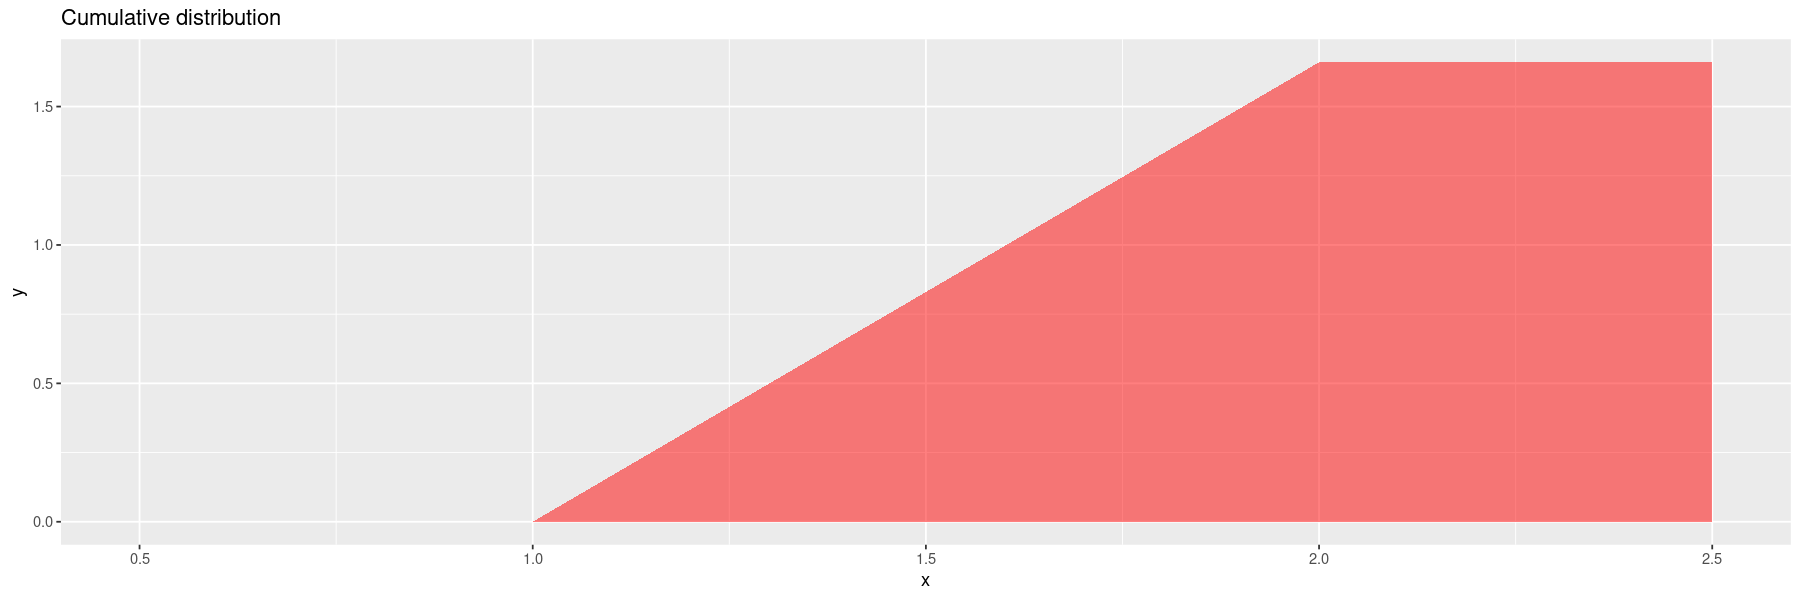

In [29]:
ptire <- function(t)
    {
        ifelse(t>1,integrate(function(x) {dtire(x)}, lower=1, upper=t,subdivisions=10000)$value,0)
    }
ptire <- Vectorize(ptire)

x <- seq(.5,2.5,.1)

df = data.frame(x=x,y=ptire(x))
df %>% ggplot(aes(x=x, y=y)) +
geom_ribbon(data=df,aes(ymax=y),ymin=0,
              fill="red",colour=NA,alpha=0.5)+
ggtitle('Cumulative distribution')

In [30]:
# By integrating the pdf 2x^-2 and inverting it we get the quantile function
# namely x = 2/(2-p)

qtire <- function(p)
    {
        ifelse(p>=0 & p<= 1,2/(2-p),0)
    }
qtire <- Vectorize(qtire)

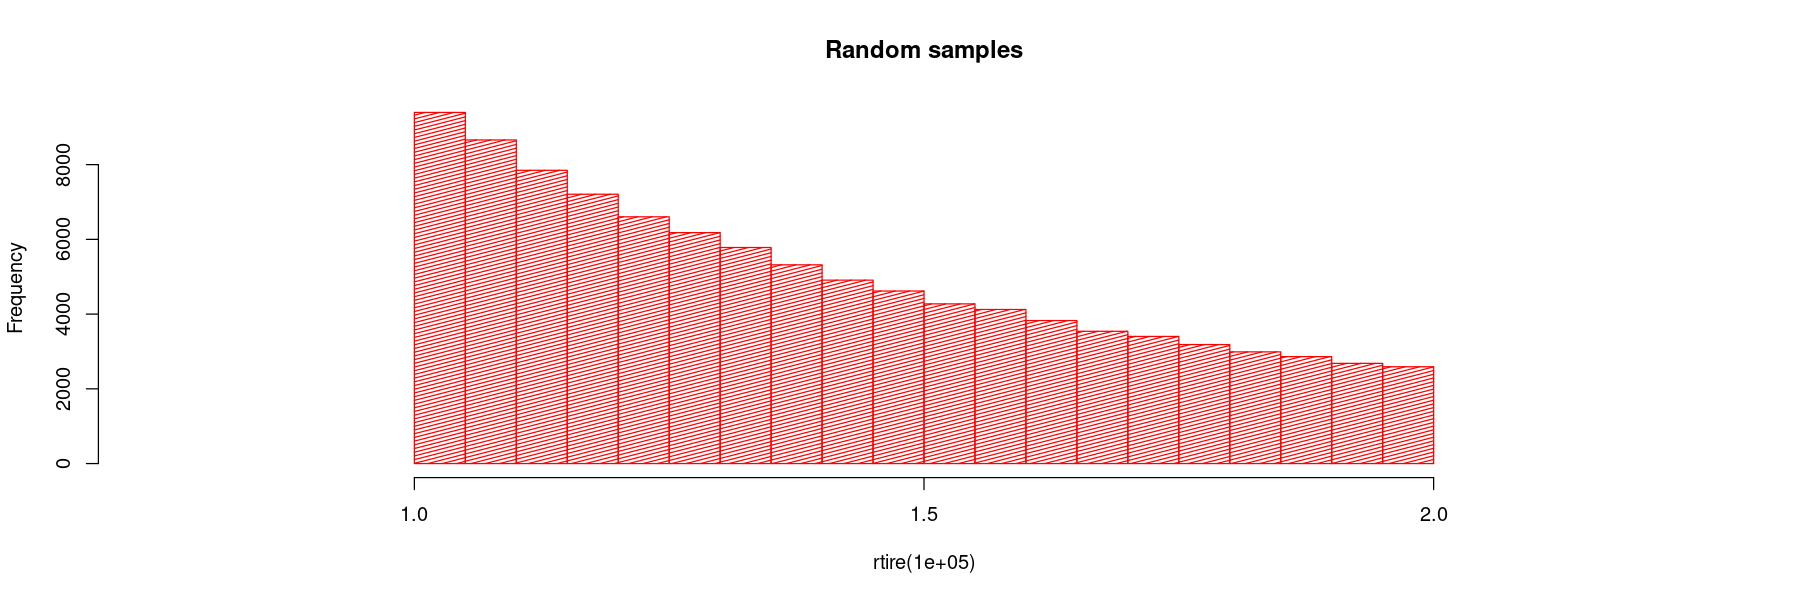

In [31]:
rtire <- function(N)
    {
        qtire(runif(N))
    }
hist(rtire(100000),xlim=c(0.75,2.25),col='red', density = 30, main='Random samples')

#### 6.2 determine the probability that tires will last less than 15000 km

In [32]:
lx <- 15000/10^4

ptire(lx)

[1] 0.830108

#### 6.3 Sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression 
$$Var(X) = E[X^2] − E[X]^2$$

In [33]:
samples <- rtire(3000)
mean_tire <- mean(samples)

variance <- mean(samples^2) - mean_tire^2
variance

var(samples)

[1] 0.07899958

[1] 0.07902592